# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 604


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        time.sleep(2)

    # Create endpoint URL with each city
    city_url = f'{url}?lat={lats[i]}&lon={lngs[i]}&appid={weather_api_key}&units=metric'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        #city_date = time.ctime(city_weather['dt']) # did this first until I saw the sample dataframe

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City or Country not found in API. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nouadhibou
City or Country not found in API. Skipping...
Processing Record 2 of Set 1 | nova vicosa
City or Country not found in API. Skipping...
Processing Record 3 of Set 1 | puerto natales
City or Country not found in API. Skipping...
Processing Record 4 of Set 1 | copala
City or Country not found in API. Skipping...
Processing Record 5 of Set 1 | port-aux-francais
City or Country not found in API. Skipping...
Processing Record 6 of Set 1 | yellowknife
City or Country not found in API. Skipping...
Processing Record 7 of Set 1 | waitangi
City or Country not found in API. Skipping...
Processing Record 8 of Set 1 | mar del plata
City or Country not found in API. Skipping...
Processing Record 9 of Set 1 | iqaluit
City or Country not found in API. Skipping...
Processing Record 10 of Set 1 | olonkinbyen
Processing Record 11 of Set 1 | wailua homesteads
Processing Record 12 of Set 1 | bredasdorp
City

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          173
Lat           173
Lng           173
Max Temp      173
Humidity      173
Cloudiness    173
Wind Speed    173
Country       173
Date          173
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,olonkinbyen,65.0260,-83.5519,-15.15,96,79,1.69,CA,1698639777
1,wailua homesteads,70.8019,-12.7869,0.71,81,100,5.84,SJ,1698639778
2,sturgis,42.3102,10.8028,21.03,88,100,13.02,IT,1698639781
3,badger,45.3333,-102.9715,-8.51,92,11,3.78,US,1698639782
4,tura,-22.0603,25.2074,15.65,78,46,9.16,BW,1698639785


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,olonkinbyen,65.0260,-83.5519,-15.15,96,79,1.69,CA,1698639777
1,wailua homesteads,70.8019,-12.7869,0.71,81,100,5.84,SJ,1698639778
2,sturgis,42.3102,10.8028,21.03,88,100,13.02,IT,1698639781
3,badger,45.3333,-102.9715,-8.51,92,11,3.78,US,1698639782
4,tura,-22.0603,25.2074,15.65,78,46,9.16,BW,1698639785


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

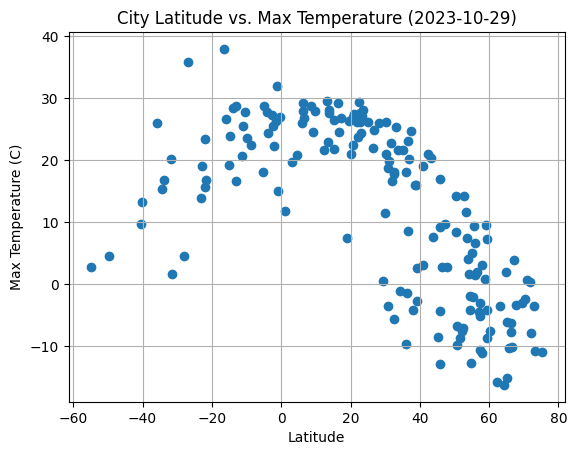

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature (2023-10-29)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

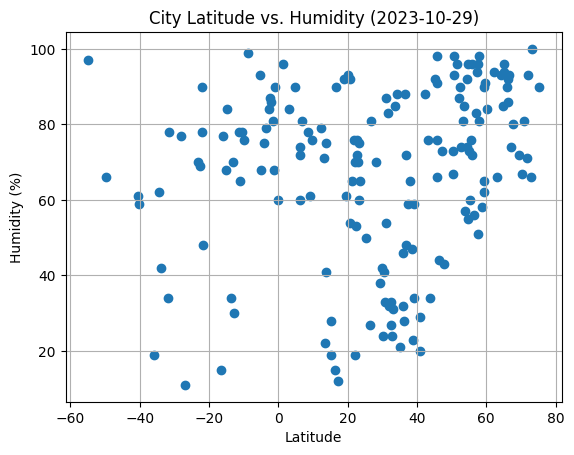

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (2023-10-29)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

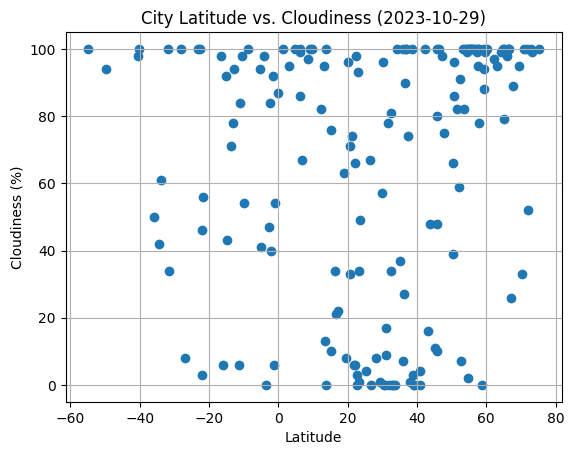

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (2023-10-29)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

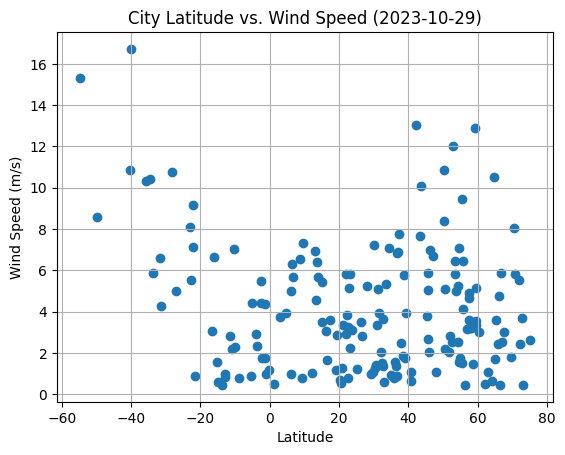

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (2023-10-29)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linReg(x_values, y_values, measure):
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    lineFit = (slope * x_values) + intercept
    line_eq = (f'y = {str(round(slope, 2))}x + {str(round(intercept, 2))}')
    # scatter plot
    plt.scatter(x_values, y_values)

    # line of best fit
    plt.plot(x_values, lineFit, 'r-')

    # show line equation
    plt.annotate(line_eq, (0, 0), (0, -30), xycoords='axes fraction', textcoords='offset points', color='red', fontsize=12)

    plt.xlabel('Latitude')
    plt.ylabel(measure)

    # print results
    print(f'The r-value is: {rvalue}')
    plt.show()

In [13]:
city_data_df.dtypes

City           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
Country        object
Date            int64
dtype: object

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,olonkinbyen,65.0260,-83.5519,-15.15,96,79,1.69,CA,1698639777
1,wailua homesteads,70.8019,-12.7869,0.71,81,100,5.84,SJ,1698639778
2,sturgis,42.3102,10.8028,21.03,88,100,13.02,IT,1698639781
3,badger,45.3333,-102.9715,-8.51,92,11,3.78,US,1698639782
6,margaret river,26.4264,44.5891,21.98,27,67,3.52,SA,1698639790


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,tura,-22.0603,25.2074,15.65,78,46,9.16,BW,1698639785
5,az zulfi,-22.1175,-176.1409,23.45,90,3,7.14,TO,1698639786
12,kirakira,-40.1270,-61.1443,13.20,59,100,16.72,AR,1698639806
18,kodiak,-13.7568,-48.4529,28.50,34,71,0.45,BR,1698639819
24,pyt-yakh,-40.3788,-74.1011,9.67,61,98,10.86,CL,1698639827


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8040080789444539


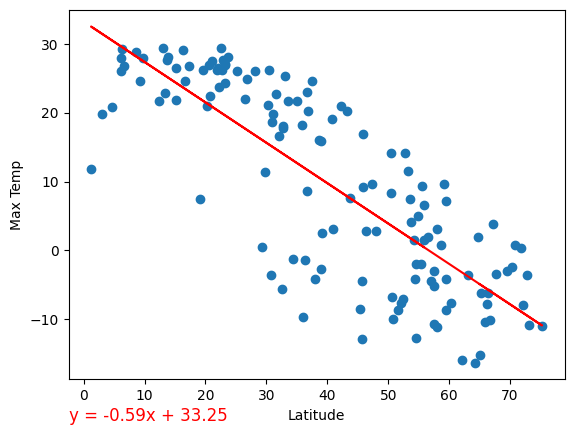

In [16]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

linReg(x_values, y_values, 'Max Temp')

The r-value is: 0.6295225939376428


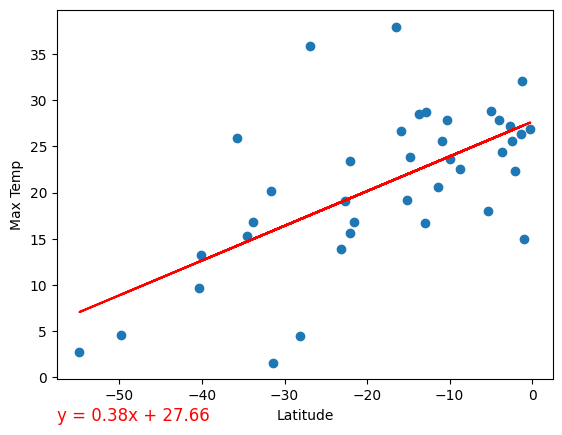

In [18]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

linReg(x_values, y_values, 'Max Temp')

**Discussion about the linear relationship:** As the latitude approaches 70 from 0, and as it approaches -50 from 0, the max temperature decreases. Put into the real world, this shows how the max temperature decreases as the location approaches the poles of the Earth. Variations found could be at significantly higher/lower altitudes - a higher altitude city would tend to have a lower temperature than the rest of the samples near its latitude.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.3359033570424955


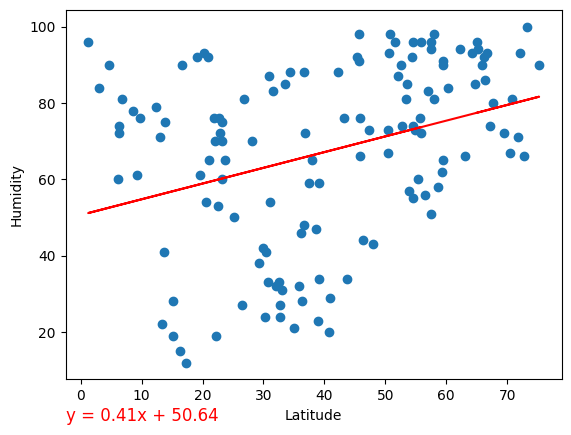

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

linReg(x_values, y_values, 'Humidity')

The r-value is: 0.27683425832978253


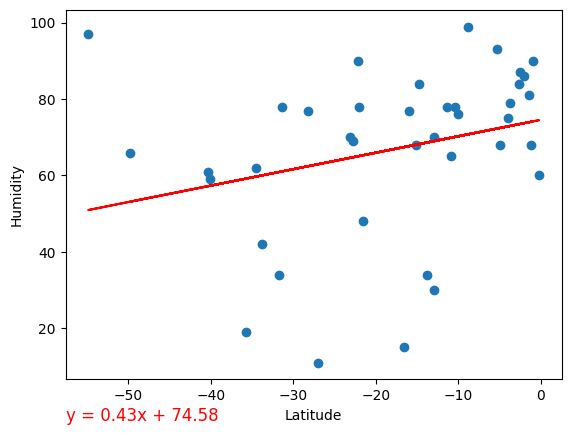

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

linReg(x_values, y_values, 'Humidity')

**Discussion about the linear relationship:** This data shows that the farther north the city is from the south pole, the humidity percentage is also higher on average. I am unsure why this data sample shows such a difference between the two hemispheres - I imagine it could be due to the time of year, or simply be due to the location cities picked in the sample. This last idea is further enforced by the low r values in both plots.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.2974884532872009


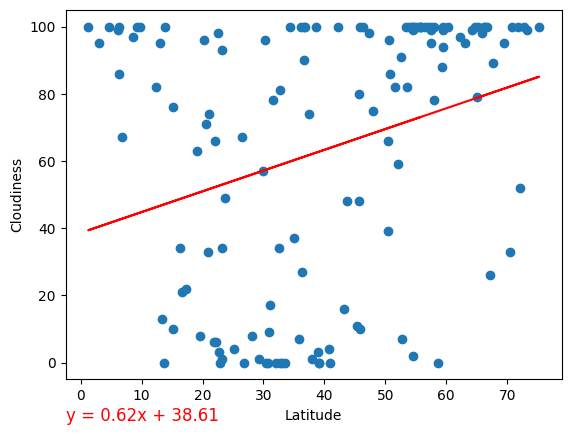

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

linReg(x_values, y_values, 'Cloudiness')

The r-value is: -0.19395736591639798


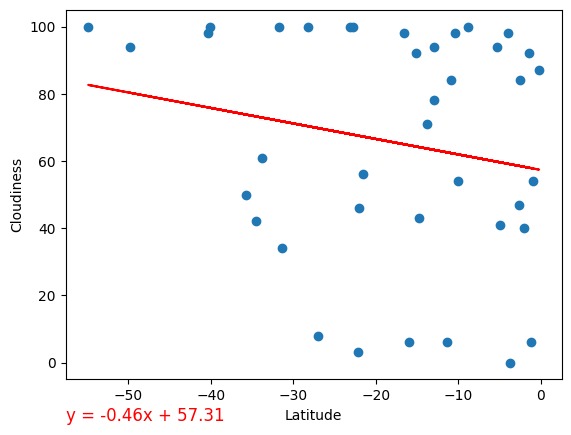

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

linReg(x_values, y_values, 'Cloudiness')

**Discussion about the linear relationship:** The r values of the Cloudiness plots are even lower than the Humidity plots. Points are spread seemlingly at random on the plots, with slight grouping around 60 degrees N (90% and higher cloud cover) and 30 degrees N (10% and lower). I would expect these plots to change regularly, showing trends following the different tropical storm cycles.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.07931206180688435


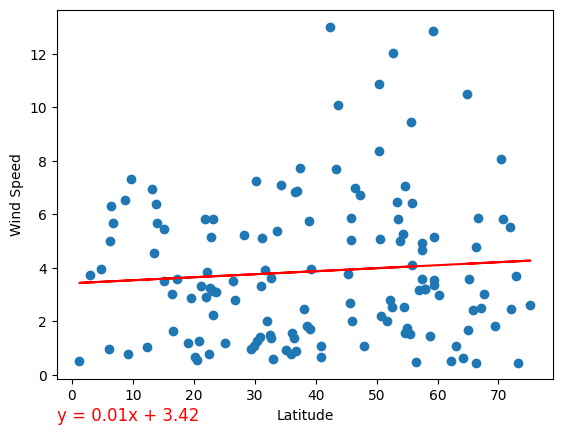

In [23]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

linReg(x_values, y_values, 'Wind Speed')

The r-value is: -0.7642837368041029


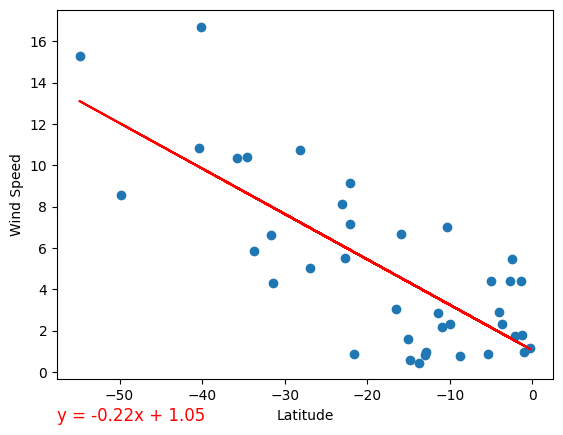

In [24]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

linReg(x_values, y_values, 'Wind Speed')

**Discussion about the linear relationship:** Wind appears to reach higher speeds around 50 degrees N and 40 to 50 degrees S. This live map (https://www.ventusky.com/?l=wind-10m&t=20231030/05) helps visualize this trend. The massive ocean area between Antarctica and the southern parts of other continents allows for much more unrestricted air/wind movement than over land. The low pressure pocket south of Greenland might also be contributing to one of the high speed points near 55 degrees N.